In interactive notebook, the `spark` object is already created.
Instructors tested with 1 driver, 6 executors of small e4 (24 cores, 192GB memory)

### Launch spark environment

In [2]:
spark

StatementMeta(b1cc13f1-0ee0-4cd0-88e0-b9f032c88fe6, 1, 7, Finished, Available, Finished)

### Set up data configuration

In [3]:
blob_account_name = "dsan6000fall2024"
blob_container_name = "reddit-project"
wasbs_base_url = (
    f"wasbs://{blob_container_name}@{blob_account_name}.blob.core.windows.net/"
)


StatementMeta(b1cc13f1-0ee0-4cd0-88e0-b9f032c88fe6, 1, 8, Finished, Available, Finished)

#### Reading in single parquet file

In [4]:
comments_path = "202306-202407/comments/"
submissions_path = "202306-202407/submissions/"

StatementMeta(b1cc13f1-0ee0-4cd0-88e0-b9f032c88fe6, 1, 9, Finished, Available, Finished)

In [5]:
# Test on a single file only (random file)

comments_single = "yyyy=2023/mm=11/comments_RC_2023-11.zst_9.parquet"
submissions_single = "yyyy=2023/mm=11/submissions_RS_2023-11.zst_36.parquet"

StatementMeta(b1cc13f1-0ee0-4cd0-88e0-b9f032c88fe6, 1, 10, Finished, Available, Finished)

In [6]:
comments_single_df = spark.read.parquet(f"{wasbs_base_url}{comments_path}{comments_single}")
submissions_single_df = spark.read.parquet(f"{wasbs_base_url}{submissions_path}{submissions_single}")

StatementMeta(b1cc13f1-0ee0-4cd0-88e0-b9f032c88fe6, 1, 11, Finished, Available, Finished)

#### Initial exploration

- Schema
- Row count

In [7]:
comments_single_df.printSchema()

StatementMeta(b1cc13f1-0ee0-4cd0-88e0-b9f032c88fe6, 1, 12, Finished, Available, Finished)

root
 |-- author: string (nullable = true)
 |-- author_flair_css_class: string (nullable = true)
 |-- author_flair_text: string (nullable = true)
 |-- body: string (nullable = true)
 |-- controversiality: long (nullable = true)
 |-- created_utc: long (nullable = true)
 |-- distinguished: string (nullable = true)
 |-- edited: double (nullable = true)
 |-- gilded: long (nullable = true)
 |-- id: string (nullable = true)
 |-- link_id: string (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- retrieved_on: long (nullable = true)
 |-- score: long (nullable = true)
 |-- stickied: boolean (nullable = true)
 |-- subreddit: string (nullable = true)
 |-- subreddit_id: string (nullable = true)



In [8]:
comments_row_count = comments_single_df.count()
comment_col_count = len(comments_single_df.columns)
print(f"shape of the comments dataframe is {comments_row_count:,}x{comment_col_count}")

StatementMeta(b1cc13f1-0ee0-4cd0-88e0-b9f032c88fe6, 1, 13, Finished, Available, Finished)

shape of the comments dataframe is 1,000,000x17


In [9]:
submissions_single_df.printSchema()



StatementMeta(b1cc13f1-0ee0-4cd0-88e0-b9f032c88fe6, 1, 14, Finished, Available, Finished)

root
 |-- author: string (nullable = true)
 |-- author_flair_css_class: string (nullable = true)
 |-- author_flair_text: string (nullable = true)
 |-- created_utc: long (nullable = true)
 |-- distinguished: string (nullable = true)
 |-- domain: string (nullable = true)
 |-- edited: double (nullable = true)
 |-- id: string (nullable = true)
 |-- is_self: boolean (nullable = true)
 |-- locked: boolean (nullable = true)
 |-- num_comments: long (nullable = true)
 |-- over_18: boolean (nullable = true)
 |-- quarantine: boolean (nullable = true)
 |-- retrieved_on: long (nullable = true)
 |-- score: long (nullable = true)
 |-- selftext: string (nullable = true)
 |-- stickied: boolean (nullable = true)
 |-- subreddit: string (nullable = true)
 |-- subreddit_id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- url: string (nullable = true)



In [10]:
submissions_row_count = submissions_single_df.count()
submissions_col_count = len(submissions_single_df.columns)
print(f"shape of the submissions dataframe is {submissions_row_count:,}x{submissions_col_count}")

StatementMeta(b1cc13f1-0ee0-4cd0-88e0-b9f032c88fe6, 1, 15, Finished, Available, Finished)

shape of the submissions dataframe is 1,000,000x21


### Reading in an entire month

In [15]:
# Test on a single month
comments_month = "yyyy=2023/mm=11/"
submissions_month = "yyyy=2023/mm=11/"

StatementMeta(b1cc13f1-0ee0-4cd0-88e0-b9f032c88fe6, 1, 20, Finished, Available, Finished)

In [16]:
comments_months_df = spark.read.parquet(f"{wasbs_base_url}{comments_path}{comments_month}")
submissions_months_df = spark.read.parquet(f"{wasbs_base_url}{submissions_path}{submissions_month}")

StatementMeta(b1cc13f1-0ee0-4cd0-88e0-b9f032c88fe6, 1, 21, Finished, Available, Finished)

#### Initial exploration

In [17]:
comments_row_count = comments_months_df.count()
comment_col_count = len(comments_months_df.columns)
print(f"shape of the comments dataframe is {comments_row_count:,}x{comment_col_count}")

StatementMeta(b1cc13f1-0ee0-4cd0-88e0-b9f032c88fe6, 1, 22, Finished, Available, Finished)

shape of the comments dataframe is 243,870,354x17


In [18]:
submissions_row_count = submissions_months_df.count()
submissions_col_count = len(submissions_months_df.columns)
print(f"shape of the submissions dataframe is {submissions_row_count:,}x{submissions_col_count}")

StatementMeta(b1cc13f1-0ee0-4cd0-88e0-b9f032c88fe6, 1, 23, Finished, Available, Finished)

shape of the submissions dataframe is 38,107,467x21


### Reeading in all of the Reddit data

In [19]:
comments_df = spark.read.parquet(f"{wasbs_base_url}{comments_path}")
submissions_df = spark.read.parquet(f"{wasbs_base_url}{submissions_path}")

StatementMeta(b1cc13f1-0ee0-4cd0-88e0-b9f032c88fe6, 1, 24, Finished, Available, Finished)

In [20]:
submissions_df.count()

StatementMeta(b1cc13f1-0ee0-4cd0-88e0-b9f032c88fe6, 1, 25, Finished, Available, Finished)

567890869

In [21]:
submissions_df.rdd.getNumPartitions()

StatementMeta(b1cc13f1-0ee0-4cd0-88e0-b9f032c88fe6, 1, 26, Finished, Available, Finished)

638

In [22]:
comments_df.count()

StatementMeta(b1cc13f1-0ee0-4cd0-88e0-b9f032c88fe6, 1, 27, Finished, Available, Finished)

3675768958

In [23]:
comments_df.rdd.getNumPartitions()

StatementMeta(b1cc13f1-0ee0-4cd0-88e0-b9f032c88fe6, 1, 28, Finished, Available, Finished)

3677

In [24]:
comments_df.printSchema()

StatementMeta(b1cc13f1-0ee0-4cd0-88e0-b9f032c88fe6, 1, 29, Finished, Available, Finished)

root
 |-- author: string (nullable = true)
 |-- author_flair_css_class: string (nullable = true)
 |-- author_flair_text: string (nullable = true)
 |-- body: string (nullable = true)
 |-- controversiality: long (nullable = true)
 |-- created_utc: long (nullable = true)
 |-- distinguished: string (nullable = true)
 |-- edited: double (nullable = true)
 |-- gilded: long (nullable = true)
 |-- id: string (nullable = true)
 |-- link_id: string (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- retrieved_on: long (nullable = true)
 |-- score: long (nullable = true)
 |-- stickied: boolean (nullable = true)
 |-- subreddit: string (nullable = true)
 |-- subreddit_id: string (nullable = true)
 |-- yyyy: integer (nullable = true)
 |-- mm: integer (nullable = true)



## Exploratory Data Analysis

Here is an example of some EDA. But, before we do that let us setup some local directory structure so that that the results can be checked in into the repo.

In [3]:
## create a directory called data/plots and data/csv to save generated data
import os
PLOT_DIR = os.path.join("Users/aem303/data", "plots")
CSV_DIR = os.path.join("Users/aem303/data", "csv")
os.makedirs(PLOT_DIR, exist_ok=True)
os.makedirs(CSV_DIR, exist_ok=True)

StatementMeta(cf47b043-0c98-4514-b15a-1e3237e3aed3, 23, 8, Finished, Available)

### How many subreddits are there and which are the more popular ones

One of the first questions we can ask is how many subreddits are there and which ones are the top 10 based on the number of submissions.

In [25]:
from pyspark.sql.functions import col, asc,desc
submissions_by_subreddit = submissions_df.groupBy("subreddit").count().orderBy(col("count"), ascending=False).collect()

StatementMeta(b1cc13f1-0ee0-4cd0-88e0-b9f032c88fe6, 1, 30, Finished, Available, Finished)

In [26]:
submissions_by_subreddit

StatementMeta(b1cc13f1-0ee0-4cd0-88e0-b9f032c88fe6, 1, 31, Finished, Available, Finished)

[Row(subreddit='dirtyr4r', count=3633005),
 Row(subreddit='JerkOffChat', count=3616759),
 Row(subreddit='AskReddit', count=2686082),
 Row(subreddit='GaySnapchatImages', count=2655639),
 Row(subreddit='GaySnapchatShare', count=2641484),
 Row(subreddit='DirtySnapchat', count=1986200),
 Row(subreddit='PokemonGoRaids', count=1341799),
 Row(subreddit='slutsofsnapchat', count=1334782),
 Row(subreddit='PersonalizedGameRecs', count=1325223),
 Row(subreddit='HentaiAndRoleplayy', count=1315212),
 Row(subreddit='u_GrownBrilliance', count=1310625),
 Row(subreddit='MonopolyGoTrading', count=1234245),
 Row(subreddit='relationship_advice', count=1149649),
 Row(subreddit='MassiveCock', count=1096306),
 Row(subreddit='DirtyChatPals', count=1024807),
 Row(subreddit='Monopoly_GO', count=970421),
 Row(subreddit='AutoNewspaper', count=946314),
 Row(subreddit='GOONED', count=917121),
 Row(subreddit='ratemycock', count=898375),
 Row(subreddit='DickPicRequestv2', count=863552),
 Row(subreddit='teenagers', cou

In [27]:
top_n = 10
top_n_subreddits = spark.createDataFrame(submissions_by_subreddit[:top_n]).toPandas()
top_n_subreddits

StatementMeta(b1cc13f1-0ee0-4cd0-88e0-b9f032c88fe6, 1, 32, Finished, Available, Finished)

,subreddit,count
0,dirtyr4r,3633005
1,JerkOffChat,3616759
2,AskReddit,2686082
3,GaySnapchatImages,2655639
4,GaySnapchatShare,2641484
5,DirtySnapchat,1986200
6,PokemonGoRaids,1341799
7,slutsofsnapchat,1334782
8,PersonalizedGameRecs,1325223
9,HentaiAndRoleplayy,1315212


## Plot a bar chart for the top 10 most popular by submission count

StatementMeta(b1cc13f1-0ee0-4cd0-88e0-b9f032c88fe6, 1, 40, Finished, Available, Finished)

Text(0.5, 1.0, 'Top 10 subreddits by suybmission count')

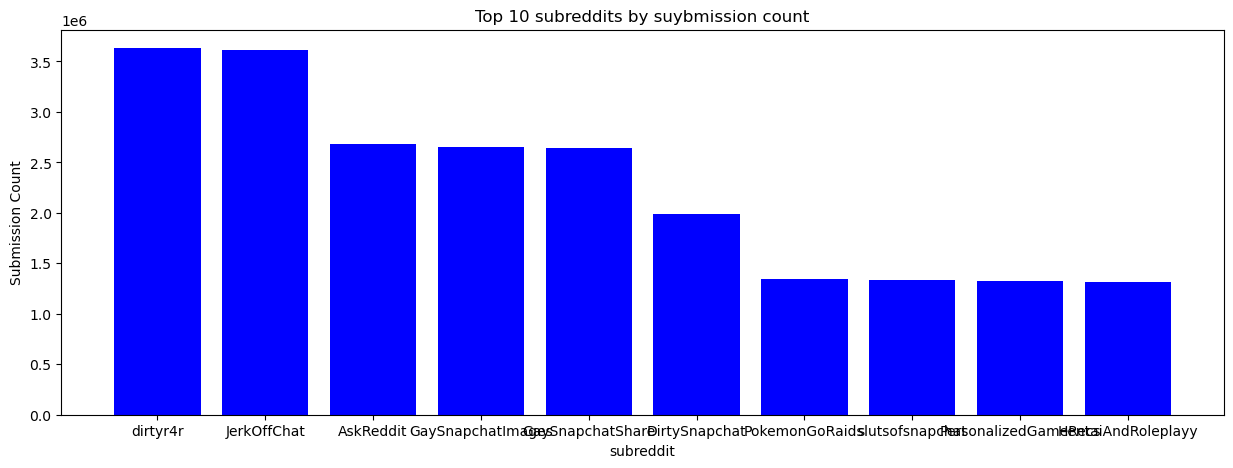

In [35]:
## Import data visualization packages
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]
plt.bar("subreddit", "count", data = top_n_subreddits, color = "blue")
plt.xlabel("subreddit")
plt.ylabel("Submission Count")
plt.title(f"Top {top_n} subreddits by suybmission count")



In [28]:
os.getcwd()

StatementMeta(b1cc13f1-0ee0-4cd0-88e0-b9f032c88fe6, 1, 33, Finished, Available, Finished)

'/synfs/notebook/1/aml_notebook_mount'

In [31]:
os.listdir("Users/mv559/")

StatementMeta(b1cc13f1-0ee0-4cd0-88e0-b9f032c88fe6, 1, 36, Finished, Available, Finished)

['azureml-ray',
 'dask-on-azureml-sample',
 'fall-2024-project-team-test',
 'project-tutorials',
 'ray-on-azureml']

In [37]:
## create a directory called data/plots and data/csv to save generated data
import os
NET_ID = "mv559" # ENTER YOUR NETID WITHOUT @georgetown.edu"
PROJECT_REPO_NAME = "fall-2024-project-team-test" # ENTER YOUR PROJECT REPO NAME
BASE_PATH = os.getcwd()
PLOT_PATH = f"{BASE_PATH}/Users/{NET_ID}/{PROJECT_REPO_NAME}/data/plots"
CSV_PATH = f"{BASE_PATH}/Users/{NET_ID}/{PROJECT_REPO_NAME}/data/csv"

StatementMeta(b1cc13f1-0ee0-4cd0-88e0-b9f032c88fe6, 1, 42, Finished, Available, Finished)

In [38]:
## Save the plot in the plot dir so that it can be checked in into the repo
plt.savefig(f"{PLOT_PATH}/top_{top_n}_subreddits.png")
plt.show()

StatementMeta(b1cc13f1-0ee0-4cd0-88e0-b9f032c88fe6, 1, 43, Finished, Available, Finished)

<Figure size 1500x500 with 0 Axes>

### Saving intermediate data

The intermediate outputs go into the azureml workspace attached storage using the URI `azureml://datastores/workspaceblobstore/paths/<PATH-TO_STORE>` this is the same for all workspaces. Then to re-load you use the same URI

In [43]:
datastore = 'azureml://datastores/workspaceblobstore/paths'
comments_single_df.write.parquet(f"{datastore}/memes.parquet")

StatementMeta(b1cc13f1-0ee0-4cd0-88e0-b9f032c88fe6, 1, 48, Finished, Available, Finished)

## Reload in future

In [9]:
comments_single_df_load = spark.read.parquet(f"{datastore}/memes.parquet")

StatementMeta(cf47b043-0c98-4514-b15a-1e3237e3aed3, 23, 14, Finished, Available)